# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:
Note: we have chosen the strike price $K = 90$ to be lower than the current spot price $S0 = 100$.

- *Call Option – Time Sensitivity:*  As the time to expiration increases, the buyer has more time to do more actions (buying, selling stocks, hedging, etc.), hence the call option value monotonically increases (becomes more valuable). Moreover, as the time to expiration approaches 0, the buyer does not have enough time for the stock price to move, so the call option price monotonically decreases to $(S0-K)^{+}e^{-r\cdot 0} = 10$. Furthermore, the function below concave, indicating that call option value drops faster as time to expiration decreases.
- *Call Option – Spot Price Sensitivity:* As the spot price increases, the call option price increases because the buyer is more likely to exercise the option and buy the stock at strike price $K$ at the time of maturity. Furthermore, as the spot price inceases, the function below is becoming linear, as we have $(S0-K)^{+} = S0-K$. On the other hand, if the spot price decreases, stock price is more likely to not go above the strike, thus the call option buyer is more likely to not exercise the call option. Therefore, the call option is becoming less valuable (call option value approaches to 0).
- *Put Option – Time Sensitivity:*  Similar to the call option time sensitivity case, as the time to expiration increases, the seller has more time to do more actions (buying, selling stocks, hedging, etc.). Therefore, the put option value monotonically increases (becomes more valuable). However, as the time to expiration approaches 0, the seller does not have enough time for the stock price to move, so the put option becomes worthless with value of 0. (Being able to sell the stock at strike price 90 when the spot price is near 100 is meaningless.) Furthermore, the function below is concave, indicating that put option value drops faster as time to expiration decreases.
- *Put Option – Spot Price Sensitivity:* The spot price is negatively correlated with the value of the put option because as the spot price increases, the stock price is less likely to go below the strike price $K$, thus the put option is less likely to be exercised at the time of maturity. Therefore, the put option contract becomes less valuable. On the other hand, if the spot price decreases (more specifically, below the strike price $K$), then the put option is more likely to be exercised, thus it becomes more valuable.

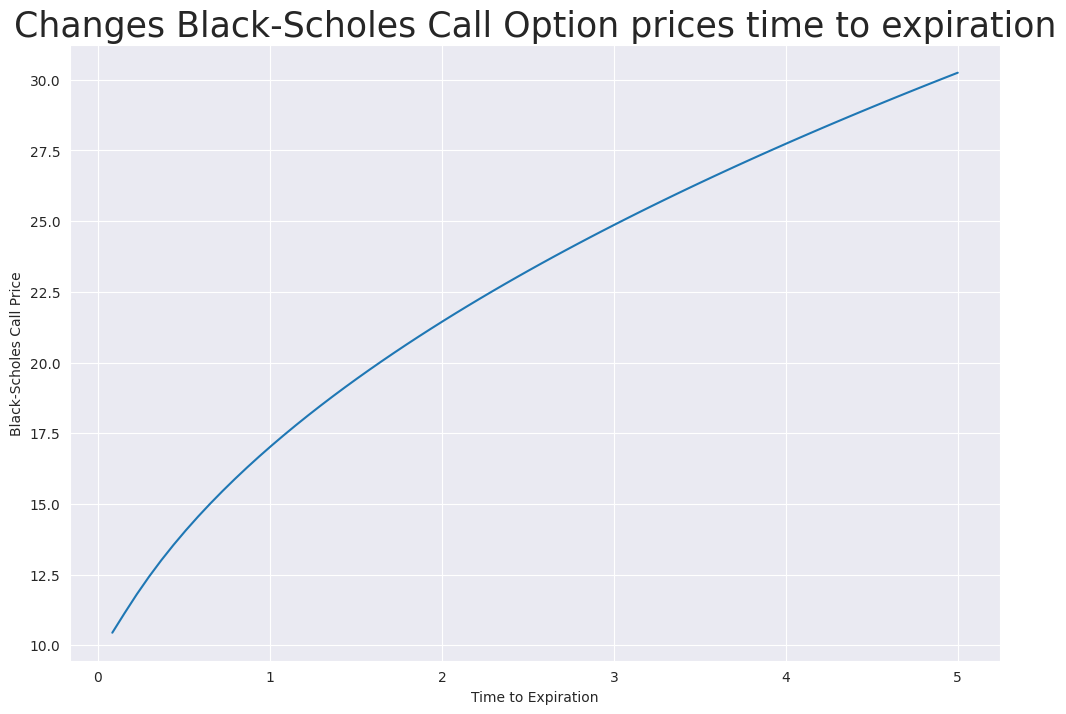

/tmp/ipython-input-6-1290454093.py:24: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))


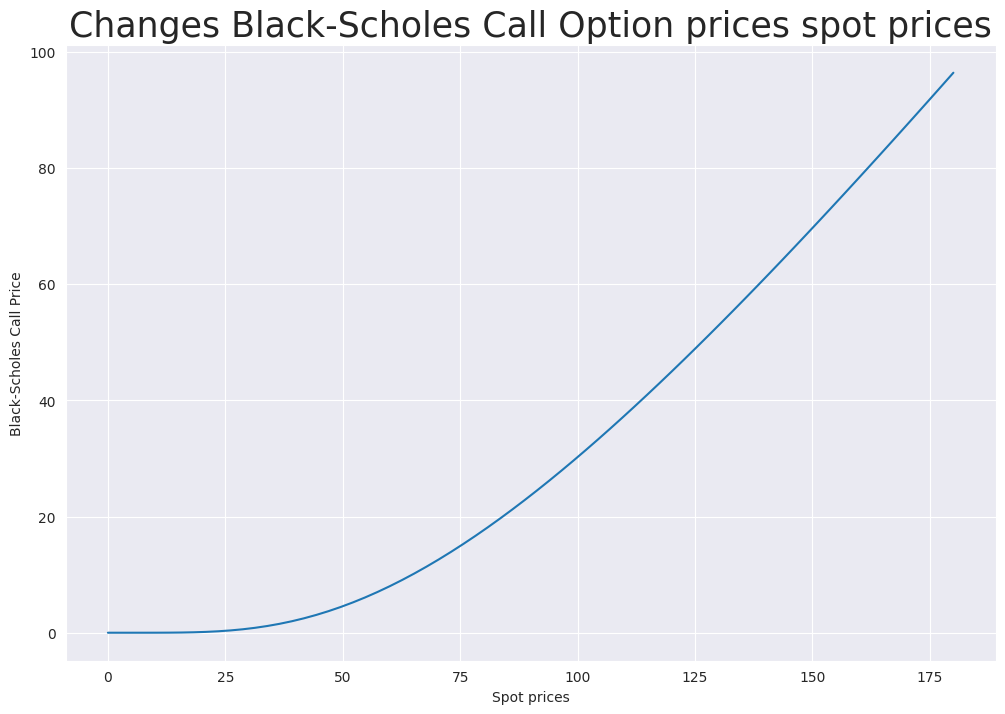

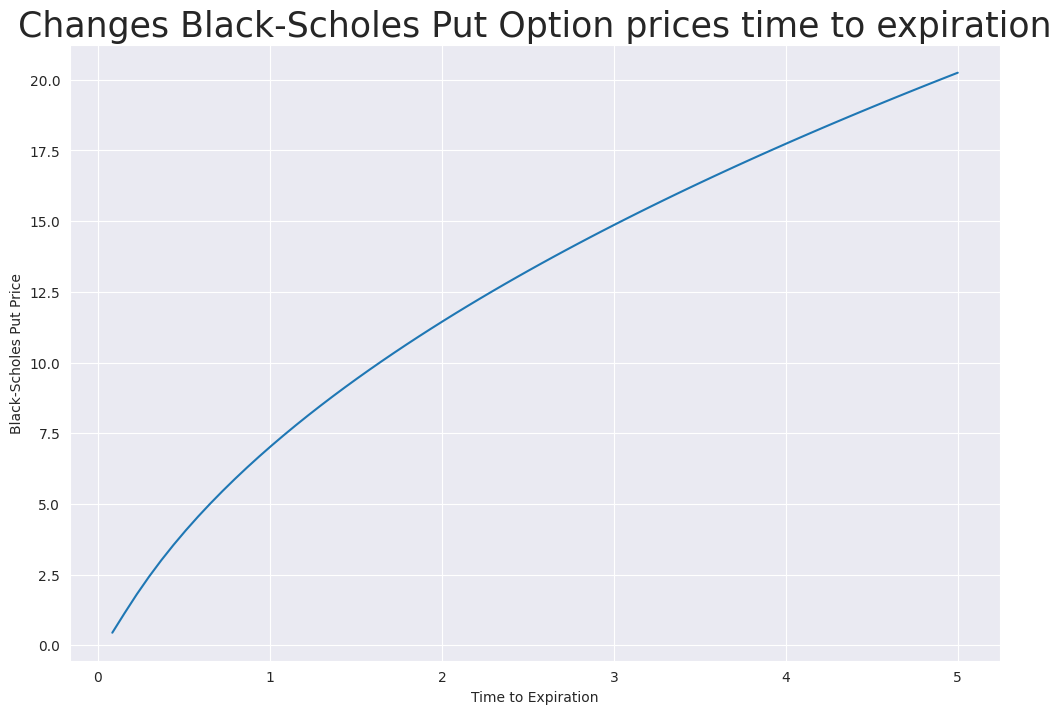

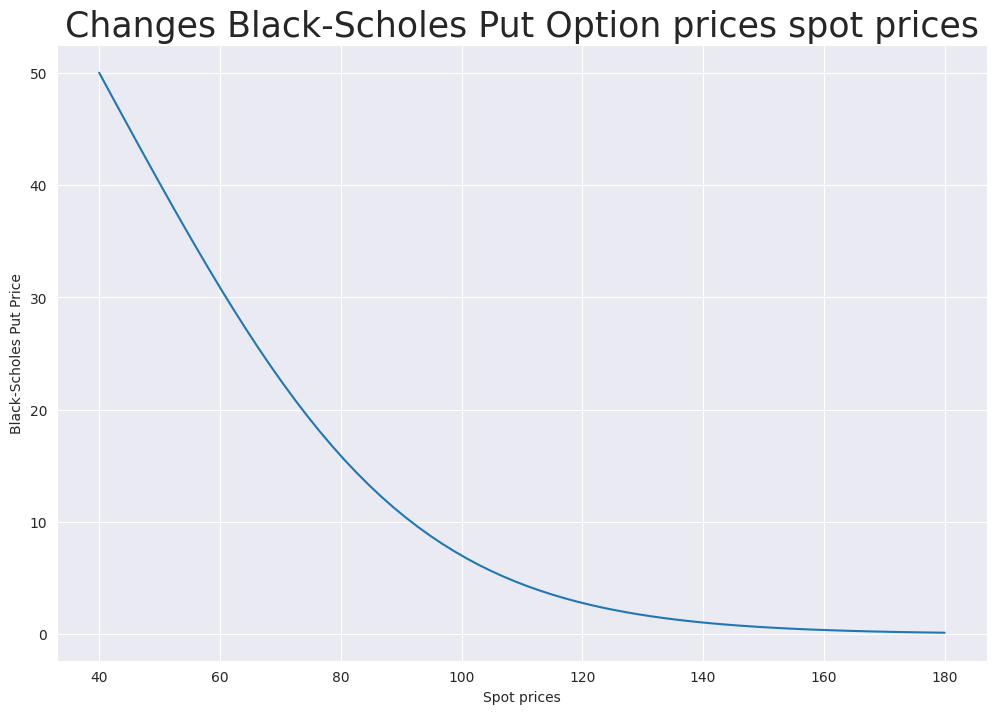

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European call option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:

    Computes the Black-Scholes value of a European put option.

    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate

    Returns:
        Put option price
    """

    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
#K = 110
K = 90
sigma = .3
times = np.linspace(1/12, 5, 70)



###### Call Option Analysis ######
call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

### Vary the spot prices between 40 and 180.
spot_prices =  np.linspace(0, 180, 70)

### Calculate the call option prices for each spot prices.
call_prices = [bs_call(spot_prices[i],K,sigma, 5) for i in range(len(times))]

### Plot the Black-Scholes call option prices when spot price is varied between 40 and 180.
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices spot prices', size = 25)
plt.plot(spot_prices, call_prices)
plt.xlabel('Spot prices')
plt.ylabel('Black-Scholes Call Price')
plt.show()




###### Put Option Analysis ######
put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

### Vary the spot prices between 40 and 180.
spot_prices =  np.linspace(40, 180, 70)

### Calculate the put option prices for each spot prices.
put_prices = [bs_put(spot_prices[i],K,sigma, 1) for i in range(len(times))]

### Plot the Black-Scholes put option prices when spot price is varied between 40 and 180.
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices spot prices', size = 25)
plt.plot(spot_prices, put_prices)
plt.xlabel('Spot prices')
plt.ylabel('Black-Scholes Put Price')
plt.show()